# CS 6140 Machine Learning: Assignment - 1 (Total Points: 100)
## Prof. Ahmad Uzair 

Siwei ZHao

### Q1. Classification Trees with numerical features (45 points)

### Datasets used for the problem:

Iris: has three classes and the task is to accurately predict one of the three sub-types of the Iris flower given four different physical features. These features include the length and width of the sepals and the petals. There are a total of 150 instances with each class having 50 instances.

### Growing Decison Trees 
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal of this question in the assignment is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

<i>Note: Write in your code only in the place holders where you are instructed to, replacing None.<i>

In [44]:
# Do not change the code in this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [45]:
# Change it to inline to show the plots
%matplotlib inline

### Here is the first look at your dataset and its feature columns

In [46]:
# Do not change the code in this cell
iris_data = pd.read_csv("iris.csv")

In [47]:
# Do not change the code in this cell
iris_data.drop("Id", axis=1, inplace=True)

In [48]:
# Do not change the code in this cell
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
# Do not change the code in this cell
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [50]:
# Do not change the code in this cell
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Task
Shuffle the data and change the categorical features mentioned in the species column to numeric

In [51]:
# Start code here
# Replace the categorical target values in the Species column to numeric
iris_data = iris_data.replace({'Species': {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}})
# Shuffle the data
iris_data = iris_data.sample(frac = 1)
# End code here

In [52]:
# Do not change the code in this cell
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
82,5.8,2.7,3.9,1.2,2
112,6.8,3.0,5.5,2.1,3
33,5.5,4.2,1.4,0.2,1
17,5.1,3.5,1.4,0.3,1
101,5.8,2.7,5.1,1.9,3


### Task
Time to code your decision tree.

In the following cell, create a node class for your Decision Tree Classifier having the following attributes:
feature_index, threshold, left, right, info_gain, value, where the condition upon which the decision will be based would be defined by feature_index and threshold, while the attributes left and right will be for accessing the left and the right child of a particular node other than the leaf node in the decision tree. info_gain will denote the information gained by the split denoted by the particular decision node. The value attribute will be holding the value of the majority class of the leaf node without having the other attributes. This will help us to determine the class of new data point.

In [53]:
class Node:  
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        # Start code here
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value
    # End code here

### Task
In the following cell, you will create a Decision Tree Classifier from scratch class having the following attributes: root, min_samples_split, max_depth. Other instructions have been given in doc strings and comments

In [54]:
class DecisionTreeClassifier:
    def __init__(self, min_samples_split=2, max_depth=2):
        # Start code here
        # Initialize the root of the decision tree to traverse through the decision tree to None
        self.root = Node()
        # initialize the stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        # End code here 
        
        
    def build_tree(self, dataset, curr_depth = 0):
        """
        This will be a recursive function to build the decision tree.
        dataset: The data that you will be using for your assignment
        curr_depth: Current depth of the tree
        Returns the leaf node
        """
        # Start code here
        # Separate the features and targets into two variables X and Y
        X = dataset.drop(['Species'], axis=1)
        Y = dataset['Species']
        # Extract the number of samples and number of features
        num_samples = len(X)
        num_features = len(dataset.columns) - 1
        
        # split until stopping conditions are met
        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            # finding the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"] > 0:
                # recur left
                left_subtree = self.build_tree(best_split['dataset_left'], curr_depth + 1)
                # recur right
                right_subtree = self.build_tree(best_split['dataset_right'], curr_depth + 1)
                # return the decision node in the form of a dictionary
                return Node(best_split["feature_index"], best_split["threshold"],
                           left_subtree, right_subtree, best_split["info_gain"])
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # End code here
        return Node(value=leaf_value)
    
        
    def get_best_split(self, dataset, num_samples, num_features):
        """
        Function to find out the best split
        dataset: input data
        num_samples: Number of samples present in the dataset
        num_features: Number of features in the dataset
        Returns the best split
        """
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # Start code here
        # loop over all the features in the data
        for feature_index in range(num_features):
            feature_values = dataset.iloc[:, feature_index]
            # Hint: You can use np.unique function to retrieve the values of the possible threshold
            possible_thresholds = feature_values.unique()
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if children are not null
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y = dataset['Species']
                    left_y = dataset_left['Species']
                    right_y = dataset_right['Species']
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if needed
                    if curr_info_gain > max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
        # End code here

        return best_split
                    
                    
    def split(self, dataset, feature_index, threshold):
        """
        Function to split the data to the left child and right child in the decision tree
        dataset: input data
        feature_index: feature index used to locate the index of the feature in a particular row in the dataset
        threshold: threshold value based on which the split will be calculated
        Returns the left and right datavalues from the dataset
        """
        # Start code here
        # Hint: Use list comprehension to distinguish which values would be present in left and right 
        # subtree on the basis of threshold
        dataset_left = dataset[dataset.iloc[:, feature_index] < threshold]
        dataset_right = dataset[dataset.iloc[:, feature_index] >= threshold]
        # End code here
        return dataset_left, dataset_right
        
        
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        """
        Function to calculate information gain. This function subtracts the combined information 
        of the child node from the parent node.
        parent: value of parent node
        l_child: value of left child node
        r_child: value of right child node
        mode: based on which information gain will be calculated either entropy/gini index
        Returns the information gain
        """
        # Start code here
        # Calculate the relative sizes of the child node with respect to the parent node
        weight_l = self.entropy(l_child) * len(l_child) / len(parent)
        weight_r = self.entropy(r_child) * len(r_child) / len(parent)
        # Calculate gain on the with respect to the information gain parameter which will either be 
        # gini_index or entropy
        if mode == "gini":
            gain = self.gini_index(parent) - weight_l - weight_r
        else:
            gain = self.entropy(parent) - weight_l - weight_r 
        # End code here
        return gain
    
    def entropy(self, y):
        """
        Function to calculate the entropy
        y: target labels
        Returns entropy
        """
        # Start code here
        # Extract the class labels
        class_labels = np.unique(y)
        # Initialize the entropy
        entropy = 0
        # Calculate the entropy
        for cls in class_labels:
            p_cls = len(y[y==cls]) / len(y)
            entropy += (-p_cls*np.log2(p_cls))
        # End code here
        return entropy
    
    
    def gini_index(self, y):
        """
        Function to calculate gini index
        y: target labels
        Returns gini index
        """
        # Extract the class labels
        class_labels = np.unique(y)
        # Initialize the gini_index
        gini = 0
        # Calculate the gini index
        for cls in class_labels:
            p_cls = len(y[y==cls]) / len(y)
            gini += p_cls ** 2
        return 1 - gini
    
    
    def calculate_leaf_value(self, Y):
        """
        Function to compute thr value of leaf node
        Y: target labels
        Returns leaf node value
        """
        # Start code here
        # Return the most occuring element in Y. Hint: you can use lists 
        Y_value = np.argmax(np.bincount(Y))
        return Y_value
        # End code here
    
    def print_tree(self, tree = None, indent = " "):
        """
        Function to print the tree. Use the pre-order traversal method to print the decision tree.
        # Do not make any changes in this function
        """
        
        if not tree:
            tree = self.root
        
        if tree.value is not None:
            print(tree.value)
            
        else:
            print("X " + str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end = " ")
            self.print_tree(tree.left, indent + indent)
            print("%sright" % (indent), end = " ")
            self.print_tree(tree.right, indent + indent)
            
            
    def fit(self, X, Y):
        """
        Function to train the tree.
        X: Features
        Y: Target
        """
        # Start code here
        # Concatenate X, Y to create the dataset and call the build_tree function recursively
        dataset = np.concatenate([X, Y], axis=1)
        dataset = pd.DataFrame(dataset, columns = iris_data.columns)
        self.root = self.build_tree(dataset, 0)
        # End code here
        
    
    def predict(self, X):
        """
        Prediction function to calculate the all the predictions of the matrix of features 
        provided using make_predictions function
        X: Matrix of features
        Returns predictions using the make_predictions function
        """
        # Start code here
        predictions = []
        for x in X:
            predictions.append(self.make_predictions(x, self.root))
        # End code here
        return predictions
    
    
    def make_predictions(self, x, tree):
        """
        Function to predict a single datapoint
        x: data
        tree: current tree
        Returns predictions
        """
        # Start code here
        # return the value if the node is a leaf node
        if tree.value != None:
            return tree.value
        # Extract feature values of a new datapoint at a given feature index
        feature_val = x[tree.feature_index]
        # Recur through left or right subtree 
        if feature_val < tree.threshold:
            return self.make_predictions(x, tree.left)
        return self.make_predictions(x, tree.right)
      # End code here
 

### Evaluating the model

In [55]:
# Do not change the code in this cell
X = iris_data.iloc[:, :-1].values
Y = iris_data.iloc[:, -1].values.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 41)
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train, Y_train)
classifier.print_tree()
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy is: "+str(accuracy_score(Y_test, y_pred)))

X 2 <= 3.0 ? 0.9340680553754911
 left: 1
 right X 3 <= 1.8 ? 0.7118632793592745
  left: X 2 <= 5.0 ? 0.2339413232514668
    left: X 3 <= 1.7 ? 0.17556502585750278
        left: 2
        right 3
    right X 3 <= 1.6 ? 0.4591479170272448
        left: 3
        right 2
  right 3
Accuracy is: 0.9666666666666667


### Q2. Regression (35 points)
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. 

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly correlated. 

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent.

The goal of this question in the assignment is to create a model that predicts the value of a target variable by learning the relationship between independent and its corresponding dependent variable using linear regression, ridge regression and gradient descent.  

<i>Note: Write in your code only in the place holders where you are instructed to, replacing None.<i>

## Gradient descent algorithm 
\begin{equation}
\theta^{+} = \theta^{-} + \frac{\alpha}{m} (y_{i} - h(x_{i}) )\bar{x}
\end{equation}

This minimizes the following cost function

\begin{equation}
J(x, \theta, y) = \frac{1}{2m}\sum_{i=1}^{m}(h(x_i) - y_i)^2
\end{equation}

where
\begin{equation}
h(x_i) = \theta^T \bar{x}
\end{equation}

In [65]:
# Do not change the code in this cell
true_slope = 15
true_intercept = 2.4
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 300.0 * np.random.rand(len(input_var))

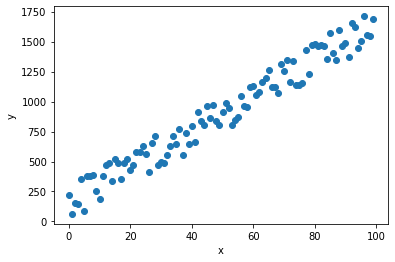

In [66]:
# Do not change the code in this cell
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [67]:
def compute_cost(ip, op, params):
    """
    Cost function in linear regression where the cost is calculated
    ip: input variables
    op: output variables
    params: corresponding parameters
    Returns cost
    """
    # Start code here
    num_samples = len(op)
    cost_sum = 0
    for x, y in zip(ip, op):
        y_hat = params[0] + params[1] * x
        cost_sum += (y - y_hat)**2

    cost = cost_sum / num_samples / 2
    # End code here
    return cost


### Batch gradient descent
Algorithm can be given as follows:

```for j in 0 -> max_iteration: 
    for i in 0 -> m: 
        theta += (alpha / m) * (y[i] - h(x[i])) * x_bar
```

In [68]:
def linear_regression_using_batch_gradient_descent(ip, op, params, alpha, max_iter):
    """
    Compute the params for linear regression using batch gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    max_iter: maximum number of iterations
    Returns parameters, cost, params_store
    """ 
    # Start code here
    # initialize iteration, number of samples, cost and parameter array
    iteration = 0
    num_samples = len(op)
    cost = np.zeros(max_iter)
    params_store = np.zeros((2, max_iter))
    
    # Compute the cost and store the params for the corresponding cost
    while iteration < max_iter:
        cost[iteration] = compute_cost(ip, op, params)
        params_store[:, iteration] = params
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        gradient_0 = 0
        gradient_1 = 0
        # Apply batch gradient descent
        for x,y in zip(ip, op):
            y_hat = params[0] + params[1] * x
            gradient_0 += (y_hat - y) / num_samples
            gradient_1 += (y_hat - y) * x / num_samples

        params[0] = params[0] - alpha * gradient_0 / 2
        params[1] = params[1] - alpha * gradient_1 / 2    
        iteration += 1
    # End code here
    
    return params, cost, params_store

In [69]:
# Do not change the code in this cell
# Training the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

params_0 = np.array([20.0, 80.0])

alpha_batch = 1e-3
max_iter = 500
params_hat_batch, cost_batch, params_store_batch =\
    linear_regression_using_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)

--------------------------
iteration: 0
cost: 6574048.46460789
--------------------------
iteration: 1
cost: 2822719.1241101627
--------------------------
iteration: 2
cost: 1214295.806560119
--------------------------
iteration: 3
cost: 524666.5732644859
--------------------------
iteration: 4
cost: 228980.21956219818
--------------------------
iteration: 5
cost: 102201.12711900008
--------------------------
iteration: 6
cost: 47842.8459289505
--------------------------
iteration: 7
cost: 24535.769244177784
--------------------------
iteration: 8
cost: 14542.231699550655
--------------------------
iteration: 9
cost: 10257.017840074957
--------------------------
iteration: 10
cost: 8419.309461860566
--------------------------
iteration: 11
cost: 7630.995568335628
--------------------------
iteration: 12
cost: 7292.620980904698
--------------------------
iteration: 13
cost: 7147.162822238795
--------------------------
iteration: 14
cost: 7084.419759798699
--------------------------
iter

### Stochastic Gradient Descent
Algorithm can be given as follows:
```shuffle(x, y)
for i in 0 -> m:
    theta += (alpha / m) * (y[i] - h(x[i])) * x_bar  
```

In [70]:
def linear_regression_using_stochastic_gradient_descent(ip, op, params, alpha):
    """
    Compute the params for linear regression using stochastic gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    Returns parameters, cost, params_store
    """
    # Start code here
    # initialize iteration, number of samples, cost and parameter array
    iteration = 0
    max_iter = 5000
    num_samples = len(op)
    cost = []
    params_store = np.zeros((2, max_iter))
    
    # Compute the cost and store the params for the corresponding cost
    while iteration < max_iter:
        cost.append(compute_cost(ip, op, params))
        params_store[:, iteration] = params

        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')

        i = np.random.randint(num_samples)

        #for x, y in zip(ip, op):
        y_hat = params[0] + params[1] * ip[i]
        gradient_0 = (y_hat - op[i]) / num_samples / 2
        gradient_1 = (y_hat - op[i]) * ip[i] / num_samples / 2

        params[0] = params[0] - alpha * gradient_0
        params[1] = params[1] - alpha * gradient_1
        
        if (abs(cost[iteration] - compute_cost(ip, op, params)) < 0.001):
            break  
        iteration += 1  
    return params, cost, params_store

In [71]:
# Do not change the code in this cell
alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store =\
linear_regression_using_stochastic_gradient_descent(x_train, y_train, params_0, alpha)

--------------------------
iteration: 0
cost: 6574048.46460789
--------------------------
iteration: 1
cost: 6190969.073962705
--------------------------
iteration: 2
cost: 5574386.474943316
--------------------------
iteration: 3
cost: 4911624.772433495
--------------------------
iteration: 4
cost: 4855384.815819754
--------------------------
iteration: 5
cost: 4564135.2668009605
--------------------------
iteration: 6
cost: 4117415.216504437
--------------------------
iteration: 7
cost: 3946124.6727462024
--------------------------
iteration: 8
cost: 3937579.0184582574
--------------------------
iteration: 9
cost: 3751153.576722525
--------------------------
iteration: 10
cost: 3637157.0087249456
--------------------------
iteration: 11
cost: 3589333.5337317204
--------------------------
iteration: 12
cost: 3544546.015146536
--------------------------
iteration: 13
cost: 3500306.9897522912
--------------------------
iteration: 14
cost: 3499145.5001646294
--------------------------
it

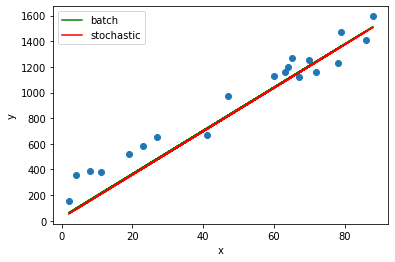

Batch      T0, T1: 27.861872599625915, 16.879079099843192
Stochastic T0, T1: 19.156073855768767, 16.932601312557313
Batch RMS:      0.0075121250583724914
Stochastic RMS: 0.0072572794396348955


In [72]:
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, params_hat_batch[0] + params_hat_batch[1]*x_test, 'g', label='batch')
plt.plot(x_test, params_hat[0] + params_hat[1]*x_test, '-r', label='stochastic')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f'Batch      T0, T1: {params_hat_batch[0]}, {params_hat_batch[1]}')
print(f'Stochastic T0, T1: {params_hat[0]}, {params_hat[1]}')
# Calculate Root Mean Square error in batch gradient descent algorithm and stochastic gradient descent algorithm
rms_batch = np.sqrt(1 / np.mean((params_hat_batch[0] + params_hat_batch[1] * x_test - y_test)**2))
rms_stochastic = np.sqrt(1 / np.mean((params_hat[0] + params_hat[1] * x_test - y_test)**2))
print(f'Batch RMS:      {rms_batch}')
print(f'Stochastic RMS: {rms_stochastic}')

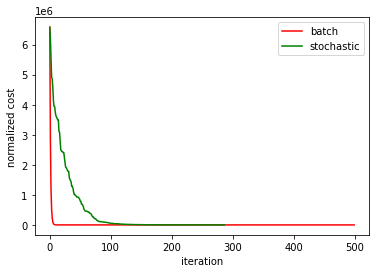

min cost with BGD: 6737.161195323204
min cost with SGD: 7043.340454240536


In [73]:
# Do not change the code in this cell
plt.figure()
plt.plot(np.arange(max_iter), cost_batch, 'r', label='batch')
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')

### Ridge Regression

\begin{equation}
\hat{\theta} = (X^TX + \lambda I)^{-1}X^TY
\end{equation}

where
\begin{equation}
X = [\bar{x}^T_1, \bar{x}^T_2, ... , \bar{x}^T_n]^T
\end{equation}

\begin{equation}
Y = [y_1, y_2, ... , y_n]^T
\end{equation}

This solution minimizes the following cost function

\begin{equation}
J(x, \theta, y) = \sum_{i=1}^{m}(\theta^T\bar{x}_i - y_i)^2 + \lambda ||\theta||^2
\end{equation}

In [74]:
class Ridge:
    """
    Linear least squares with L2 regularization.
    """
    
    def __init__(self, lam):
        """
        Initialize a Ridge object.
        lam: the regularization factor 
        """
        self._lambda = lam
        
    @staticmethod
    def _x_bar(x):
        """
        Create the vector x_bar.
        x: input vector
        """
        # Start code here
        return np.hstack(([1.0], x, np.square(x)))
        # End code here
    
    def fit(self, x_train, y_train):
        """
        Generate a fit for the data.
        x_train: the input values of the training data
        y_train: the output values of the training data
        """
        # Start code here
        # stack the data
        X = np.vstack(([self._x_bar(x) for x in x_train]))
        Y = np.vstack(([y for y in y_train]))
        
        # compute the model coeff
        XT = X.T
        XTX = np.dot(XT, X) + self._lambda * np.identity(3)
        XTX_inv = np.linalg.inv(XTX)
        XTY = np.dot(XT, Y)
        self._coeff_hat = np.dot(XTX_inv, XTY)
        # End code here

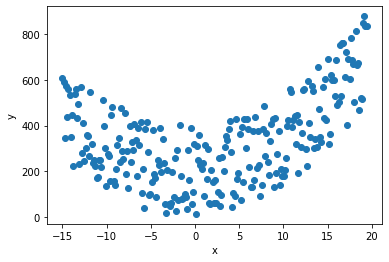

In [75]:
# Do not change the code in this cell
c2 = 0.03
c1 = 1.25
c0 = 3.23
x_in = np.linspace(-15.0, 19.4, 250)
y_out = c1 * x_in ** 2 + c1 * x_in + c0 + 400.0 * np.random.rand(len(x_in))

plt.figure()
plt.scatter(x_in, y_out)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [76]:
# Do not change the code in this cell
# Train using the custom Ridge class

x_train, x_test, y_train, y_test = train_test_split(
    x_in, y_out, test_size=0.20)

lam = 0.1
ridge = Ridge(lam)
ridge.fit(x_train, y_train)

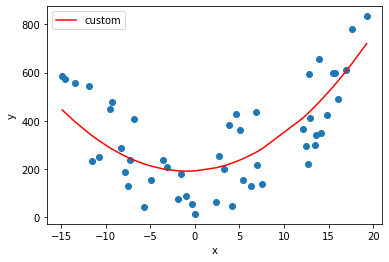

custom: [192.84715707], [2.33470115], [1.30128135]


In [77]:
# Do not change the code in this cell
# Plot test data and model predictions
plt.figure()
plt.scatter(x_test, y_test)
x_test_sorted = np.sort(x_test)
plt.plot(x_test_sorted,
         ridge._coeff_hat[0] + ridge._coeff_hat[1]*x_test_sorted + ridge._coeff_hat[2]*x_test_sorted**2,
         '-r', label='custom')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# print the coeff
print(f'custom: {ridge._coeff_hat[0]}, {ridge._coeff_hat[1]}, {ridge._coeff_hat[2]}')

In [78]:
# Effect of regularization factor
coeff_store = []
norm_store = []
factors = np.linspace(0.0, 1.0, 10)
for l in factors:
    # Star code here
    # instantiate the Ridge class using l and store it in ridge
    ridge = Ridge(l)
    # fit the data to your model
    ridge.fit(x_train, y_train)
    # append co-effecients 
    coeff_store.append(ridge._coeff_hat)
    # append normalized co-effecients using np.linalg.norm
    norm_store.append(np.linalg.norm(ridge._coeff_hat))


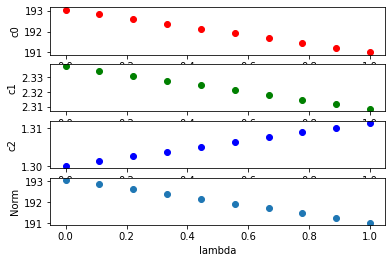

In [79]:
# Do not change the code in this cell
plt.figure()
plt.subplot(411)
coeff_0 = [c[0] for c in coeff_store]
plt.plot(factors, coeff_0, 'or')
plt.ylabel('c0')
plt.subplot(412)
coeff_1 = [c[1] for c in coeff_store]
plt.plot(factors, coeff_1, 'og')
plt.ylabel('c1')
plt.subplot(413)
coeff_2 = [c[2] for c in coeff_store]
plt.plot(factors, coeff_2, 'ob')
plt.ylabel('c2')
plt.subplot(414)
plt.plot(factors, norm_store, 'o')
plt.xlabel('lambda')
plt.ylabel('Norm')
plt.show()

### Q3. Theory (10 marks)

Consider training a binary decision tree using entropy splits.

(a) Prove that the decrease in entropy by a split on a binary yes/no feature can never be greater than 1 bit.

(b) Generalize this result to the case of arbitrary multiway branching.

(a) Use d denotes dataset, the entropy of the original dataset is H(d)

$H(D) = - \sum_{i}{P(D_i)\log_2 (P(D_i))} $

Split the dataset into two features $F = (f_l, f_r)$, the entropy for the two child nodes can be calculated as:

$$P(f_l)H(L) + P(f_r)H(R) = - P(f_l) \sum_{i}(P(d_i | f_l) * log_2(P(d_i|f_l)) )- P(f_r) \sum_{i}(P(d_i|f_r)*log_2(P(d_i|f_r)))$$

where,

$$P(d_i | f_l) = \frac{P(d_i, f_l)}{P(f_l)}, P(d_i | f_r) = \frac{P(d_i, f_r)}{P(f_r)}$$

so,

   $$P(f_l)H(L) + P(f_r)H(R) = - P(f_l) \sum_{i}(\frac {P(d_i, f_l)}{P(f_l)} * log_2(\frac {P(d_i, f_l)}{P(f_l)}) )- P(f_r) \sum_{i}(\frac {P(d_i, f_r)}{P(f_r)}*log_2(\frac {P(d_i, f_r)}{P(f_r)}))$$

   $$P(f_l)H(L) + P(f_r)H(R) = - \sum_{i}( P(d_i, f_l) * log_2(\frac {P(d_i, f_l)}{P(f_l)} ))-  \sum_{i}( P(d_i, f_r)*log_2(\frac {P(d_i, f_r)}{P(f_r)}))$$

   $$P(f_l)H(L) + P(f_r)H(R) = - \sum_{i}( P(d_i, f_l) * log_2( P(d_i, f_l) - log_2 {P(f_l)}))-  \sum_{i}( P(d_i, f_r)*log_2(P(d_i, f_r) - log_2(P(f_r)))$$

   $$P(f_l)H(L) + P(f_r)H(R) = - \sum_{i}( P(d_i, f_l) * log_2( P(d_i, f_l))) + \sum_{i}(P(d_i, f_l) * log_2 {P(f_l)})-   \sum_{i}( P(d_i, f_r) * log_2( P(d_i, f_r))) + \sum_{i}(P(d_i, f_r) * log_2 {P(f_r)}) $$

where,

$$\sum_{i}(P(d_i, f_l) = P(f_l),  \sum_{i}(P(d_i, f_r) = P(f_r) $$

so,

   $$P(f_l)H(L) + P(f_r)H(R) = - \sum_{i}( P(d_i, f_l) * log_2( P(d_i, f_l))) - \sum_{i}( P(d_i, f_r) * log_2( P(d_i, f_r))) + P(f_l) * log_2 {P(f_l)} +P(f_r) * log_2 {P(f_r)} $$

$$P(f_l)H(L) + P(f_r)H(R) = H(D, F) - H(F)$$

So the decrease in entropy is 

$$ \Delta H = H(D) - P(f_l)H(L) + P(f_r)H(R)$$

$$ \Delta H = H(D) - H(D, F) + H(F)$$

since 

$$H(D) - H(D, F) \leq 0$$
and it is a yes/no binary split, For the maximum H(F)

$$ H(F)_{max} = - \frac{1}{2}log_2(\frac {1}{2}) -  - \frac{1}{2}log_2(\frac {1}{2})  = 1 \space bit  $$

$$H(F) \leq  1 \space bit$$

$$H(D) - H(D, F) + H(F) \leq 1 \space bit$$

so,
$$ \Delta H = H(D) - H(D, F) + H(F) \leq 1 \space bit$$

So decrease in entropy by a split on a binary yes/no feature can never be greater than 1 bit


(b) Similarly for n way branching
Use d denotes dataset, the entropy of the original dataset is H(d)

$$H(D)=−∑_iP(D_i)log_2(P(D_i))$$

Split the dataset into n features $F = (f_1, f_2, ... f_n)$, the entropy for all the child nodes can be calculated as:

$$P(f_1)H(D_1) + P(f_2)H(D_2) + ... + P(f_n)H(D_n) = H(D, F) - H(F)$$

$$\Delta H = H(D) - H(D, F) + H(F) \leq H(F)$$

where,

$$H(F)_{max} = -\frac{1}{n} log_2 (\frac {1}{n}) * n = log_2 (n)$$

$$\Delta H \leq log_2 (n)$$

So decrease in entropy by a split on a n way branching can never be greater than $log_2(n)$ bit

### Q4. Gradient Descent Application (10 marks)

1. For the function \begin{equation} f(x, y) = ln(1 + xy), \end{equation}
find the unit vector that gives the direction of steepest descent at the point
P (2, 3). Also find the direction of no change at this point.


2. A businessperson can sell a product in France and Japan and charge different prices in each region. Let x represent the number of units sold in France and y represent the number of units sold in Japan. According to demand rules, the business owner must set the unit price at 97-(x/10) dollars in France and 83-(y/20) dollars in Japan in order to sell all of the units. The cost of production is ${\$ 3}$ per unit, in addition to a base capital of ${\$ 20,000}.$ If the industrialist intends to maximize profit, how many units should he aim to sell in each country?

1. $f(x, y) = ln(1 + xy)$

   $\nabla f (x, y) = (\frac{\partial f}{\partial x_1} , \frac{\partial f}{\partial x_2} )= (\frac {y}{1+xy}, \frac {x}{1+xy}) $ 

   At point P(2, 3)

   $ \nabla f(2, 3) = (\frac {3}{7}, \frac{2}{7})$

   The steepest descent vector $\hat u$

   $\hat u = -\nabla f(2, 3) = (-\frac {3}{7}, -\frac{2}{7})$

   The unit steepest descent vector $\hat i$

   $\hat i = \frac {\hat u}{\Vert \hat u \Vert} = (-\frac {3}{7} * \frac{1}{\sqrt{(-\frac {3}{7})^2 + (-\frac {2}{7})^2}}, -\frac {2}{7} * \frac{1}{\sqrt{(-\frac {3}{7})^2 + (-\frac {2}{7})^2}})$

    $\hat i = (-\frac{3}{\sqrt{13}}, -\frac{2}{\sqrt{13}})$

    The unit vector pf the direction of no change at the point P(2, 3), $\hat v$

    $\hat v$ should be otthogonal to $\hat i$ so that there is no change at the point P(2, 3) at the direction of $\hat v$, o

    $\hat v \cdot \hat i = 0 $

    $\hat v = (\frac {2}{\sqrt {13}}, \frac {-3}{\sqrt {13}})$

    The unit vector that gives the direction of steepest descent at the point P (2, 3) is $\hat i = (-\frac{3}{\sqrt{13}}, -\frac{2}{\sqrt{13}})$

     The unit vector that gives that gives no change at this point is $\hat v = (\frac {2}{\sqrt {13}}, \frac {-3}{\sqrt {13}})$


2. The profit can be calculated as 

  profit = Price_in_France * units_sold_in_France + Price_in_Japan * units_sold_in_Japan - cost_per_unit * total_unit_sold - base_capital

  So the profit f(x, y) is:

  $f(x, y) = (97 - \frac {x}{10}) * x + (83 - \frac{y}{20}) * y - 3 * (x + y) - 20000$

  $f(x, y) = - \frac {x^2}{10} + 94x + - \frac{y^2}{20} + 80y - 20000$

  The partial derivative is:
  
  $f_x = \frac {\partial f}{\partial x} = -\frac {x}{5} + 94$

  $f_y = \frac {\partial f}{\partial y} = -\frac {y}{10} + 80$

  $f_{xx} = \frac {\partial^2 f}{\partial x^2 } = -\frac {1}{5}$

  $f_{yy} = \frac {\partial^2 f}{\partial y^2} = -\frac {1}{10}$

  $f_{xy} = \frac {\partial^2 f}{\partial x \partial y} = 0$

  $\nabla f(x, y) = (f_x, f_y) = (-\frac {x}{5} + 94,  -\frac {y}{10} + 80)$

  Let $f_x = 0, f_y = 0$, the only solution is:

  x = 470, y = 800

  (470, 800) is a stationary point and only stationary point for f(x, y)

  Since,

  $f_{xx} < 0$ and $ f_{yy} < 0$,
  
  so (470, 800) is a maximum point for f(x, y)

  So to get the maximum profit, the business person should sell 470 units in France and 800 units in Japan


